<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 4

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Dataset ''Electric_Production.csv'**

## A partir de um DataFrame, utilize os modelos abaixo para fazer previsões para os 30 períodos futuros.

1. ARIMA (2,0,0)

2. ARIMA (2,0,1)
    
3. ARIMA (2,2,1)
    
4. ARIMA (8,2,1)
    
5. Crie um gráfico com todas as previsões acima.
    
6. Entre estes, qual é o melhor? Utilize a métrica AIC.  
    
7. Use o auto-arima e apresente o melhor modelo encontrado.

### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
!gdown 1_0buQPyM_CznA5H5qNMzmizP07jVS2r1

Downloading...
From: https://drive.google.com/uc?id=1_0buQPyM_CznA5H5qNMzmizP07jVS2r1
To: /content/Electric_Production.csv
100% 7.32k/7.32k [00:00<00:00, 25.4MB/s]


In [3]:
df = pd.read_csv('Electric_Production.csv')

In [22]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [7]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


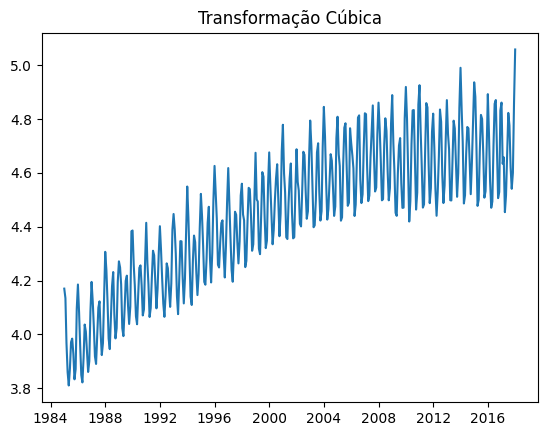

In [9]:
serie_cubica = df ** (1/3)

plt.figure()
plt.title('Transformação Cúbica')
plt.plot(serie_cubica)
plt.show()

In [12]:
print("\n### Modelo AR ###")
AR = sm.tsa.arima.ARIMA(serie_cubica.values, order=(2, 0, 0))
resultado = AR.fit()
print(resultado.summary())


### Modelo AR ###
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 317.150
Date:                Sat, 14 Dec 2024   AIC                           -626.299
Time:                        13:04:40   BIC                           -610.364
Sample:                             0   HQIC                          -619.987
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4503      0.034    131.460      0.000       4.384       4.517
ar.L1          1.3014      0.054     24.068      0.000       1.195       1.407
ar.L2         -0.4679      0.056 

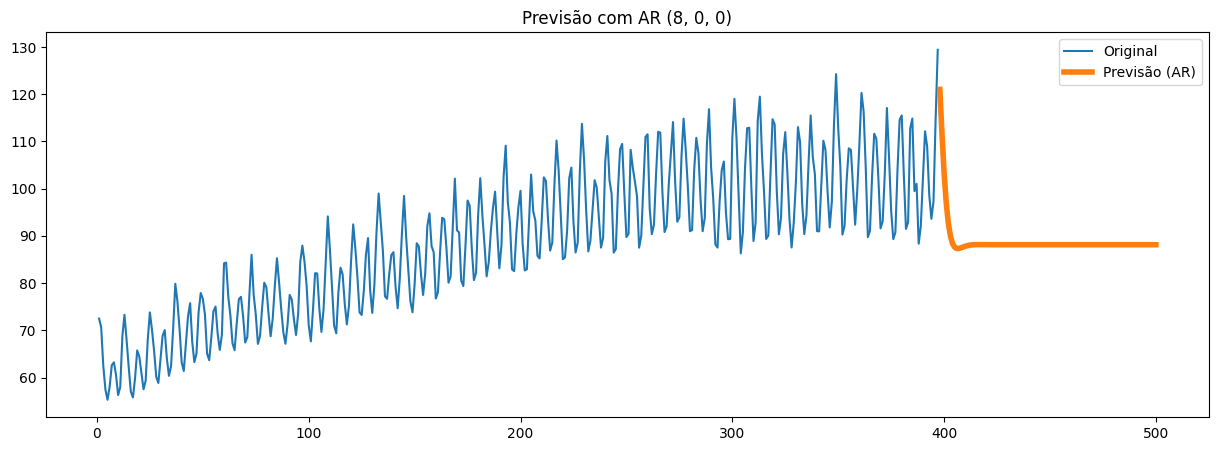

In [15]:
previsao = resultado.predict(start=398, end=500)
serprev = list(previsao ** 3)

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(df)+1), df, label='Original')
plt.plot(range(len(df)+1, len(df)+len(serprev)+1), serprev, label='Previsão (AR)', lw=4)
plt.legend()
plt.title('Previsão com AR (2, 0, 0)')
plt.show()


### Modelo AR ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 350.653
Date:                Sat, 14 Dec 2024   AIC                           -691.306
Time:                        13:06:53   BIC                           -671.387
Sample:                             0   HQIC                          -683.415
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4497      0.036    124.169      0.000       4.380       4.520
ar.L1          1.0293      0.083     12.358      0.000       0.866       1.193
ar.L2         -0.2404      0.083     -2.906      0.0

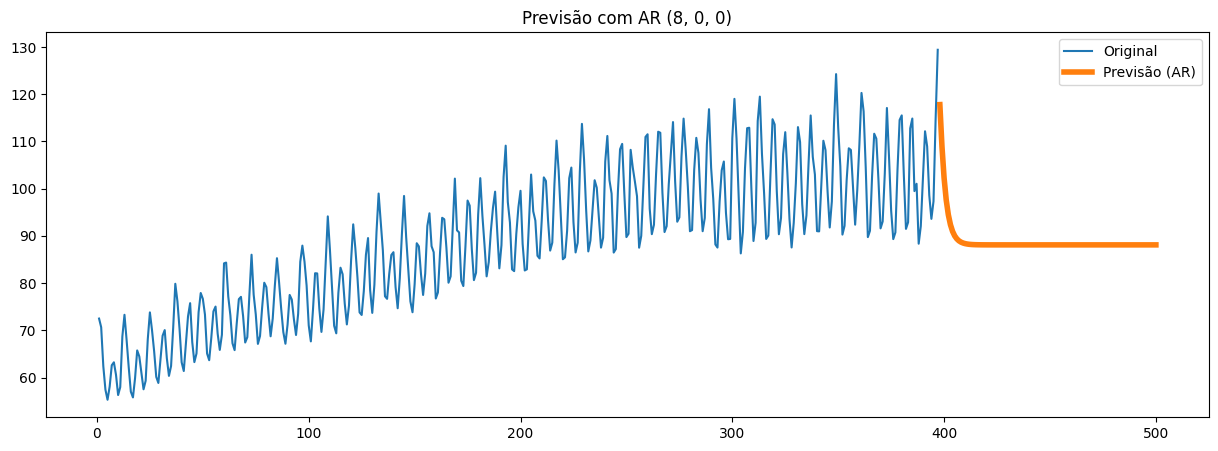

In [16]:
print("\n### Modelo AR ###")
AR = sm.tsa.arima.ARIMA(serie_cubica.values, order=(2, 0, 1))
resultado = AR.fit()
print(resultado.summary())

previsao = resultado.predict(start=398, end=500)
serprev = list(previsao ** 3)

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(df)+1), df, label='Original')
plt.plot(range(len(df)+1, len(df)+len(serprev)+1), serprev, label='Previsão (AR)', lw=4)
plt.legend()
plt.title('Previsão com ARMA (2, 0, 1)')
plt.show()


### Modelo AR ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 406.592
Date:                Sat, 14 Dec 2024   AIC                           -805.185
Time:                        13:07:18   BIC                           -789.269
Sample:                             0   HQIC                          -798.879
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6395      0.038     16.719      0.000       0.564       0.714
ar.L2         -0.6802      0.040    -17.078      0.000      -0.758      -0.602
ma.L1         -1.0000     15.301     -0.065      0.9

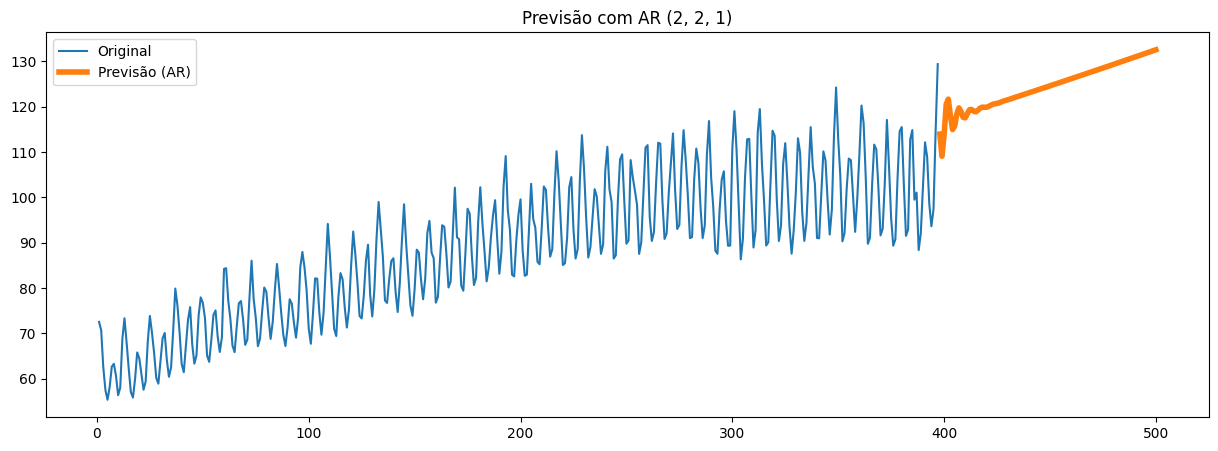

In [17]:
print("\n### Modelo AR ###")
AR = sm.tsa.arima.ARIMA(serie_cubica.values, order=(2, 2, 1))
resultado = AR.fit()
print(resultado.summary())

previsao = resultado.predict(start=398, end=500)
serprev = list(previsao ** 3)

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(df)+1), df, label='Original')
plt.plot(range(len(df)+1, len(df)+len(serprev)+1), serprev, label='Previsão (AR)', lw=4)
plt.legend()
plt.title('Previsão com ARIMA (2, 2, 1)')
plt.show()


### Modelo AR ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 406.592
Date:                Sat, 14 Dec 2024   AIC                           -805.185
Time:                        13:07:35   BIC                           -789.269
Sample:                             0   HQIC                          -798.879
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6395      0.038     16.719      0.000       0.564       0.714
ar.L2         -0.6802      0.040    -17.078      0.000      -0.758      -0.602
ma.L1         -1.0000     15.301     -0.065      0.9

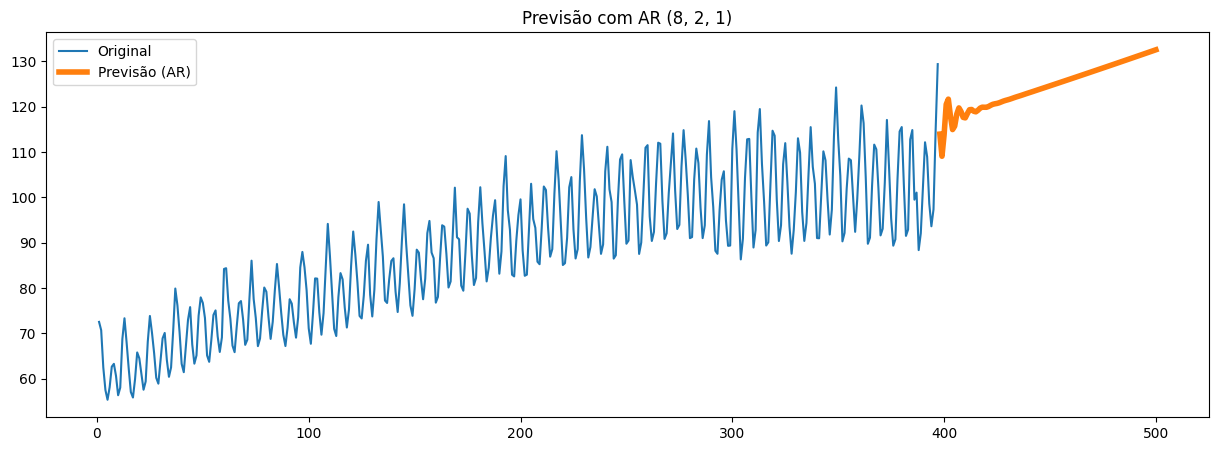

In [18]:
print("\n### Modelo AR ###")
AR = sm.tsa.arima.ARIMA(serie_cubica.values, order=(2, 2, 1))
resultado = AR.fit()
print(resultado.summary())

previsao = resultado.predict(start=398, end=500)
serprev = list(previsao ** 3)

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(df)+1), df, label='Original')
plt.plot(range(len(df)+1, len(df)+len(serprev)+1), serprev, label='Previsão (AR)', lw=4)
plt.legend()
plt.title('Previsão com ARIMA (8, 2, 1)')
plt.show()

# O melhor modelo entre os anteriores é ARIMA (8,2,1)

In [19]:
!pip install pmdarima
from pmdarima.arima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00


In [20]:
print("\n### Modelo AUTO-ARIMA ###")
modelo_auto = auto_arima(
    serie_cubica,
    trace=True,          # Exibe o progresso e combinações de parâmetros testados
    stepwise=True,       # Utiliza busca stepwise para acelerar o processo de ajuste
    seasonal=True,       # Considera sazonalidade no modelo (ativa P, D, Q, m)
    max_p=12,            # Máximo número de lags autorregressivos (p)
    max_q=2,             # Máximo número de lags para média móvel (q)
    max_P=12,            # Máximo número de componentes sazonais autorregressivos (P)
    max_Q=1,             # Máximo número de componentes sazonais de média móvel (Q)
    start_p=0,           # Valor inicial para p
    start_q=0,           # Valor inicial para q
    start_P=0,           # Valor inicial para P
    start_Q=0,           # Valor inicial para Q
    m=12                 # Sazonalidade mensal (período da série, ex.: 12 meses)
)


### Modelo AUTO-ARIMA ###
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-512.592, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-870.706, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-514.467, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-645.746, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-1371.155, Time=2.52 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-1236.238, Time=2.53 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-1356.100, Time=5.68 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-1282.370, Time=3.41 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-1352.104, Time=1.56 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-1415.277, Time=5.64 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-869.252, Time=1.00 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-1295.445, Time=1.80 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-1379.550, Tim

In [21]:
print("AIC do modelo AUTO-ARIMA:", modelo_auto.aic())

AIC do modelo AUTO-ARIMA: -1430.328937837944


In [31]:
previsao_auto = modelo_auto.predict(n_periods=20)  # Prever 20 períodos futuros
previsao_auto_cubica = previsao_auto ** 3  # Revertendo a transformação cúbica

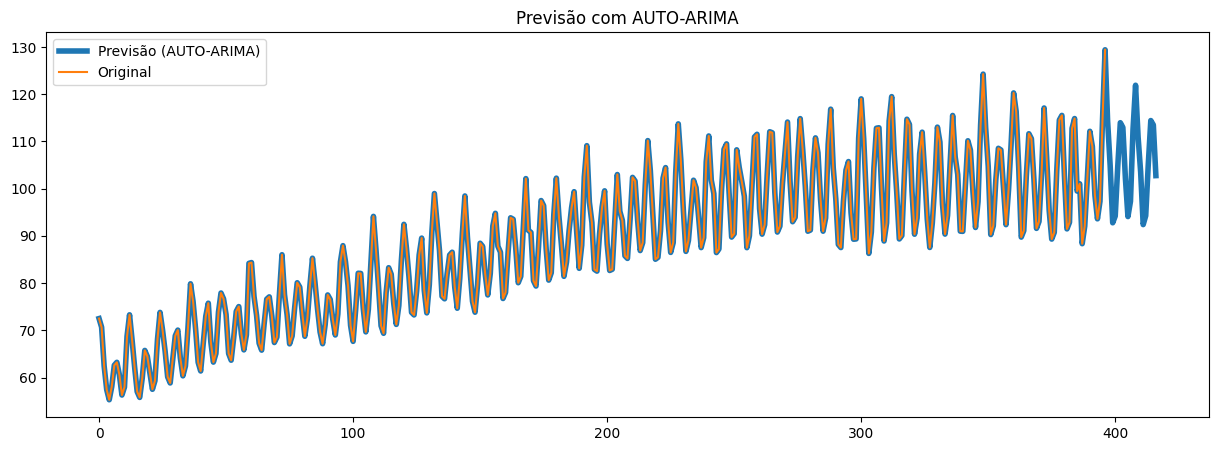

In [40]:
serprev = list(df.values) + list(previsao_auto_cubica)
previsao = pd.Series(data=serprev, index=pd.date_range(start='1985-01-01', freq='ME', periods=len(serprev)))

plt.figure(figsize=(15, 5))
plt.plot(range(len(previsao)), previsao, label='Previsão (AUTO-ARIMA)', lw=4)
plt.plot(range(len(df)), df, label='Original')
plt.legend()
plt.title('Previsão com AUTO-ARIMA')
plt.show()